## Magnus Carlsen vs. Fabiano Caruana (Chess.com Speed Chess Chamionships 2022)  Match Analysis

In December 2022, Magnus Carlsen (Current World Chess Champion) and Fabiano Caruana (Top 10 Player and a former contender to the world title) played a quarter final match in Chess.com Speed Chess Chamionships where Carlsen Defeated Caruana 22-4 without losing a single game!

This made me question what exactly happened for Magnus to defeat a world class player in such a dominating fashion? Did Caruana simply have a bad day? Was Magnus Performing at his peak level? How long did the match stay competitive? And what was Magnus' secret for winning in such a dominating fashion?

I set out to attempt to answer these questions and investigate their match by using the data.

1. Thanks to Chess.com public API, I was able to obtain all of Magnus' december games and transform them to two files:
    - magnuscarlsen-games-2022-12.csv
    - magnuscarlsen-moves-2022-12.csv
2. By using the strongest chess engine available (StockFish 15), I was able to analyze every move in all of the games to obtain the engine evaluation after every single move 


### Now Let's begin the fun part! using this data to gain insights about the games and find out what happened!

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [204]:
df_games = pd.read_csv(r'C:\Users\ramez\PycharmProjects\SCCTrials\magnuscarlsen-games-2022-12.csv')
df_moves = pd.read_csv(r'C:\Users\ramez\PycharmProjects\SCCTrials\magnuscarlsen-moves-2022-12.csv', index_col=0)

In [205]:
df_games.head()

,game_id,game_date,white_player,black_player,white_elo,black_elo,opening_id,opening,result,termination,time_control,time_class,variant,rated,white_accuracy,black_accuracy
0,63649618347,2022.12.01,MagnusCarlsen,Duhless,3248,3095,B30,Sicilian-Defense-Nyezhmetdinov-Rossolimo-Attack,1-0,MagnusCarlsen won by checkmate,300,blitz,chess,True,93.33,80.24
1,63649776859,2022.12.01,Duhless,MagnusCarlsen,3090,3253,E11,Bogo-Indian-Defense-Grunfeld-Variation,0-1,MagnusCarlsen won by resignation,300,blitz,chess,True,80.33,83.06
2,63650380553,2022.12.01,MagnusCarlsen,Duhless,3250,3093,B30,Sicilian-Defense-Nyezhmetdinov-Rossolimo-Attack,1/2-1/2,Game drawn by repetition,300,blitz,chess,True,86.22,86.52
3,63650984969,2022.12.01,Duhless,MagnusCarlsen,3096,3247,A47,Indian-Game-Marienbad-System,1/2-1/2,Game drawn by repetition,300,blitz,chess,True,92.97,93.45
4,63651567351,2022.12.01,MagnusCarlsen,Duhless,3252,3091,C80,Ruy-Lopez-Opening-Morphy-Defense-Open-6.d4-b5-...,1-0,MagnusCarlsen won on time,300,blitz,chess,True,93.48,88.62


In [206]:
df_moves.head()

,game_id,white_move,black_move,white_clock,black_clock,eval_type_white,eval_type_black,eval_after_white,eval_after_black
0,63649618347,e2e4,c7c5,300.0,299.0,cp,cp,31,41
1,63649618347,g1f3,b8c6,298.6,297.9,cp,cp,36,44
2,63649618347,f1b5,e7e5,297.7,296.9,cp,cp,36,59
3,63649618347,e1g1,g8e7,293.8,295.6,cp,cp,47,63
4,63649618347,f1e1,g7g6,254.3,288.8,cp,cp,22,26


#### Now let's see some summary statistics about the match by filtering for the Magnus vs Fabiano games

In [207]:
match_games = df_games[(df_games['white_player'] == 'FabianoCaruana') | (df_games['black_player'] == 'FabianoCaruana')]
match_games.head()

,game_id,game_date,white_player,black_player,white_elo,black_elo,opening_id,opening,result,termination,time_control,time_class,variant,rated,white_accuracy,black_accuracy
216,64693417735,2022.12.13,MagnusCarlsen,FabianoCaruana,3282,3022,E36,Nimzo-Indian-Defense-Classical-Noa-Variation-5...,1-0,MagnusCarlsen won by resignation,300+1,blitz,chess,True,92.75,82.64
217,64694052149,2022.12.13,FabianoCaruana,MagnusCarlsen,3019,3285,C88,Ruy-Lopez-Opening-Morphy-Defense-Anti-Marshall...,0-1,MagnusCarlsen won by resignation,300+1,blitz,chess,True,83.71,94.94
218,64694690621,2022.12.13,MagnusCarlsen,FabianoCaruana,3280,3024,D30,Queens-Gambit-Declined-3.Nf3-Nf6,1/2-1/2,Game drawn by insufficient material,300+1,blitz,chess,True,98.20,98.19
219,64695307129,2022.12.13,FabianoCaruana,MagnusCarlsen,3029,3275,E46,Nimzo-Indian-Defense-Normal-Line-4...O-O,1/2-1/2,Game drawn by insufficient material,300+1,blitz,chess,True,92.61,91.68
220,64696491521,2022.12.13,MagnusCarlsen,FabianoCaruana,3270,3034,C42,Petrovs-Defense-Classical-Attack-5...d5-6.Bd3,1/2-1/2,Game drawn by insufficient material,300+1,blitz,chess,True,96.21,96.91


#### How Many Games were played?

In [208]:
num_games = len(match_games)
print(f"The match had {num_games} games")

The match had 26 games


#### How many games won, drawn or lost by magnus?

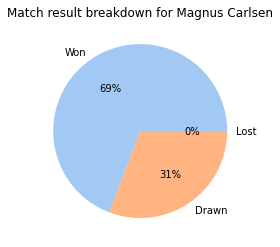

In [209]:
num_games_won = len(match_games[match_games['termination'].str.contains('MagnusCarlsen won')])
num_games_drawn = len(match_games[match_games['termination'].str.contains('Game drawn')])
num_games_lost = len(match_games[match_games['termination'].str.contains('FabianoCaruana won')])

data_points = [num_games_won, num_games_drawn, num_games_lost]
data_labels = ['Won', 'Drawn', 'Lost']

colors = sns.color_palette('pastel')[0:5]

plt.pie(data_points, labels = data_labels, colors = colors, autopct='%.0f%%')
plt.title("Match result breakdown for Magnus Carlsen")
plt.show()

#### Wow! that's an impressive stat! Now let's look at match result break down by each time format

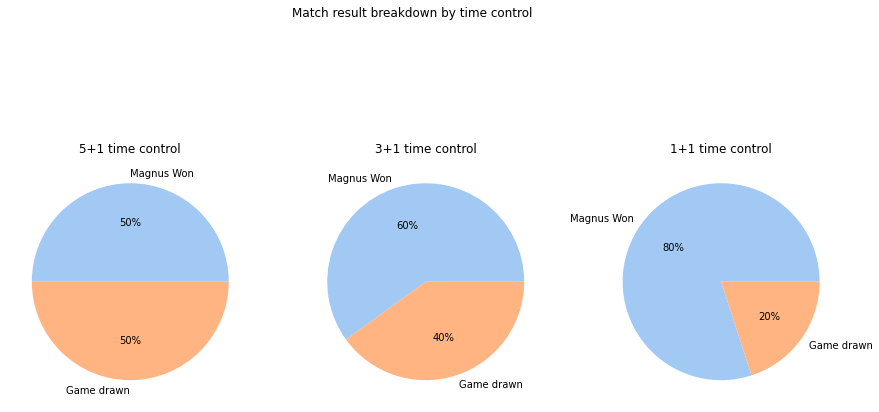

In [210]:
num_games_won_five = len(match_games[(match_games['time_control'] == '300+1') & (match_games['termination'].str.contains('MagnusCarlsen won'))])
num_games_drawn_five = len(match_games[(match_games['time_control'] == '300+1') & (match_games['termination'].str.contains('Game drawn'))])

num_games_won_three = len(match_games[(match_games['time_control'] == '180+1') & (match_games['termination'].str.contains('MagnusCarlsen won'))])
num_games_drawn_three = len(match_games[(match_games['time_control'] == '300+1') & (match_games['termination'].str.contains('Game drawn'))])

num_games_won_bullet = len(match_games[(match_games['time_control'] == '60+1') & (match_games['termination'].str.contains('MagnusCarlsen won'))])
num_games_drawn_bullet = len(match_games[(match_games['time_control'] == '60+1') & (match_games['termination'].str.contains('Game drawn'))])


data_points_five = [num_games_won_five, num_games_drawn_five]
data_points_three = [num_games_won_three, num_games_drawn_three]
data_points_bullet = [num_games_won_bullet, num_games_drawn_bullet]
data_labels = ['Magnus Won', 'Game drawn']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,8))
ax1.pie(data_points_five, labels = data_labels, colors = colors, autopct='%.0f%%')
ax1.set_title('5+1 time control')
ax2.pie(data_points_three, labels = data_labels, colors = colors, autopct='%.0f%%')
ax2.set_title('3+1 time control')
ax3.pie(data_points_bullet, labels = data_labels, colors = colors, autopct='%.0f%%')
ax3.set_title('1+1 time control')
fig.suptitle('Match result breakdown by time control')
plt.show()

#### It looks like they were relatively close in the 5+1 time control but Magnus clearly had the upper hand in faster time controls.

#### Now let's look at the breakdown of Game results for Magnus 

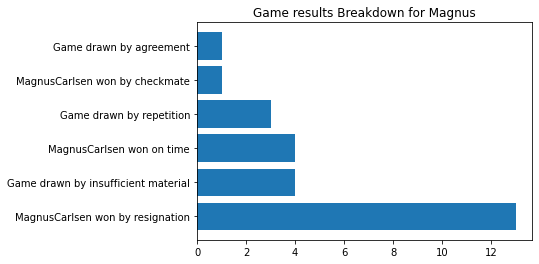

In [211]:
wins_series = match_games['termination'].value_counts()
plt.barh(wins_series.index, wins_series.values)
plt.title("Game results Breakdown for Magnus")
plt.show()

#### And also the breakdown by each time control

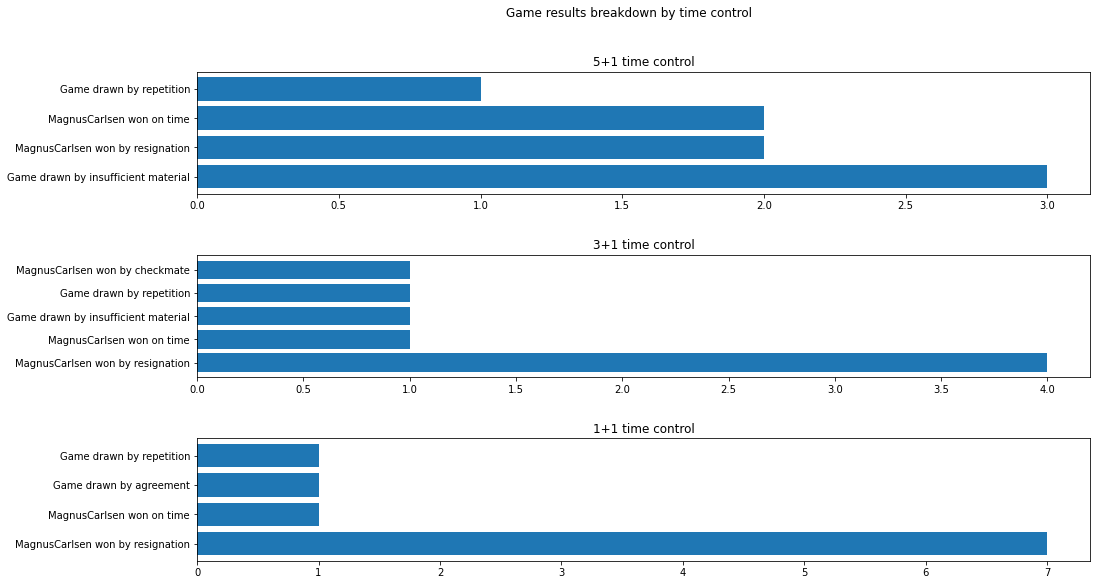

In [212]:
wins_series_five = match_games[match_games['time_control'] == '300+1']['termination'].value_counts()
wins_series_three = match_games[match_games['time_control'] == '180+1']['termination'].value_counts()
wins_series_bullet = match_games[match_games['time_control'] == '60+1']['termination'].value_counts()

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 9))
plt.subplots_adjust(hspace=0.5)
ax1.barh(wins_series_five.index, wins_series_five.values)
ax1.set_title('5+1 time control')
ax2.barh(wins_series_three.index, wins_series_three.values)
ax2.set_title('3+1 time control')
ax3.barh(wins_series_bullet.index, wins_series_bullet.values)
ax3.set_title('1+1 time control')
fig.suptitle('Game results breakdown by time control')
plt.show()

#### It looks like Magnus won convincingly most of the time with only 4 wins out of his impressive 18 were won on time.

#### What about openings? let's see what type of opening played in this match

In [213]:
opening_count = match_games['opening'].value_counts()
opening_count = pd.DataFrame({
    'Opening': opening_count.index,
    'Count': opening_count.values
})
opening_count

,Opening,Count
0,Petrovs-Defense-Three-Knights-Game,2
1,Petrovs-Defense-Classical-Attack-5...d5-6.Bd3,2
2,Ruy-Lopez-Opening-Morphy-Defense-Columbus-Vari...,2
3,Nimzo-Indian-Defense-Classical-Noa-Variation-5...,1
4,English-Opening-Fianchetto-Ultra-Symmetrical-Line,1
5,Reti-Opening-Kingside-Fianchetto-Variation,1
6,Queens-Pawn-Opening-Chigorin-Variation-2...Nf6...,1
7,French-Defense-Exchange-Variation-3...exd5-4.B...,1
8,Queens-Pawn-Opening-Symmetrical-Variation,1
9,Modern-Defense-Standard-Two-Knights-Variation,1


#### Let's group opening by opening family and get a general sense of the different openings played in the match

In [214]:
ruy_lopez = match_games[match_games['opening'].str.contains("Ruy-Lopez")]
petrovs = match_games[match_games['opening'].str.contains("Petrovs-Defense")]
nimzo_indian = match_games[match_games['opening'].str.contains('Nimzo-Indian')]
modern = match_games[match_games['opening'].str.contains('Modern-Defense')]
sicilian = match_games[match_games['opening'].str.contains('Sicilian-Defense')]
queens_gambit = match_games[match_games['opening'].str.contains('Queens-Gambit')]
queens_pawn = match_games[match_games['opening'].str.contains('Queens-Pawn-Opening')]

opening_family = pd.DataFrame({
    'Opening Family': ["Ruy-Lopez", "Petrovs-Defense", 'Nimzo-Indian', 'Modern-Defense', 'Sicilian-Defense', 'Queens-Gambit', 'Queens-Pawn-Opening'],
    'Count': [len(ruy_lopez), len(petrovs), len(nimzo_indian), len(modern), len(sicilian), len(queens_gambit), len(queens_pawn)]
})

opening_family.sort_values(['Count'], ascending=False)

,Opening Family,Count
1,Petrovs-Defense,4
0,Ruy-Lopez,3
2,Nimzo-Indian,3
3,Modern-Defense,3
4,Sicilian-Defense,2
5,Queens-Gambit,2
6,Queens-Pawn-Opening,2


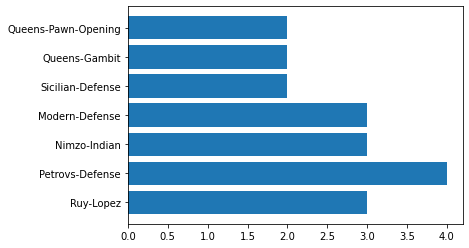

In [215]:
plt.barh(opening_family['Opening Family'], opening_family['Count'])
plt.show()

### Now let's take a closer look at the overall quality of the games played by analysing accuracies

In [216]:
magnus_white_accuracy = match_games[match_games['white_player'] == 'MagnusCarlsen']['white_accuracy']
magnus_black_accuracy = match_games[match_games['black_player'] == 'MagnusCarlsen']['black_accuracy']
all_magnus_accuracy = pd.concat([magnus_white_accuracy, magnus_black_accuracy], ignore_index=True)

print("Average accuracy for Magnus while playing white: {:.2f}%".format(magnus_white_accuracy.mean()))
print("Median accuracy for Magnus while playing white: {:.2f}%".format(magnus_white_accuracy.median()))
print("-------------------------------------------------------")
print("Average accuracy for Magnus while playing black: {:.2f}%".format(magnus_black_accuracy.mean()))
print("Median accuracy for Magnus while playing black: {:.2f}%".format(magnus_black_accuracy.median()))
print("-------------------------------------------------------")
print("Average overall accuracy for Magnus: {:.2f}%".format(all_magnus_accuracy.mean()))
print("Median overall accuracy for Magnus: {:.2f}%".format(all_magnus_accuracy.median()))

Average accuracy for Magnus while playing white: 89.79%
Median accuracy for Magnus while playing white: 91.06%
-------------------------------------------------------
Average accuracy for Magnus while playing black: 91.71%
Median accuracy for Magnus while playing black: 91.91%
-------------------------------------------------------
Average overall accuracy for Magnus: 90.75%
Median overall accuracy for Magnus: 91.61%


#### Interesting to note that Magnus had a higher accuracy while playing with black than his overall accuracy

#### Now let's do the same for Fabiano Caruana to find out his quality of play

In [217]:
fabi_white_accuracy = match_games[match_games['white_player'] == 'FabianoCaruana']['white_accuracy']
fabi_black_accuracy = match_games[match_games['black_player'] == 'FabianoCaruana']['black_accuracy']
all_fabi_accuracy = pd.concat([fabi_white_accuracy, fabi_black_accuracy], ignore_index=True)

print("Average accuracy for Caruana while playing white: {:.2f}%".format(fabi_white_accuracy.mean()))
print("Median accuracy for Caruana while playing white: {:.2f}%".format(fabi_white_accuracy.median()))
print("-------------------------------------------------------")
print("Average accuracy for Caruana while playing black: {:.2f}%".format(fabi_black_accuracy.mean()))
print("Median accuracy for Caruana while playing black: {:.2f}%".format(fabi_black_accuracy.median()))
print("-------------------------------------------------------")
print("Average overall accuracy for Caruana: {:.2f}%".format(all_fabi_accuracy.mean()))
print("Median overall accuracy for Caruana: {:.2f}%".format(all_fabi_accuracy.median()))

Average accuracy for Caruana while playing white: 87.41%
Median accuracy for Caruana while playing white: 86.95%
-------------------------------------------------------
Average accuracy for Caruana while playing black: 83.96%
Median accuracy for Caruana while playing black: 82.64%
-------------------------------------------------------
Average overall accuracy for Caruana: 85.69%
Median overall accuracy for Caruana: 85.18%


#### While considerably less than Magnus, Caruana had an ok performance. Mostly with the white pieces.

### Now Let's dig deeper into the quality of play by analysing on the individual move level

#### Let's find the overall average move time and per game

In [218]:
df_moves.head()

,game_id,white_move,black_move,white_clock,black_clock,eval_type_white,eval_type_black,eval_after_white,eval_after_black
0,63649618347,e2e4,c7c5,300.0,299.0,cp,cp,31,41
1,63649618347,g1f3,b8c6,298.6,297.9,cp,cp,36,44
2,63649618347,f1b5,e7e5,297.7,296.9,cp,cp,36,59
3,63649618347,e1g1,g8e7,293.8,295.6,cp,cp,47,63
4,63649618347,f1e1,g7g6,254.3,288.8,cp,cp,22,26


In [219]:
for game_id in df_moves['game_id'].unique():
    df_moves.loc[df_moves['game_id'] == game_id, 'white_move_time'] = abs(df_moves.loc[df_moves['game_id'] == game_id, 'white_clock'].diff())
    df_moves.loc[df_moves['game_id'] == game_id, 'black_move_time'] = abs(df_moves.loc[df_moves['game_id'] == game_id, 'black_clock'].diff())

In [220]:
df_moves = df_moves.merge(df_games, on='game_id', how='inner')
df_moves = df_moves[['game_id', 'white_move', 'black_move', 'white_clock', 'black_clock', 'eval_type_white', 'eval_type_black', 'eval_after_white', 'eval_after_black', 'white_move_time', 'black_move_time', 'white_player', 'black_player', 'time_control']]

In [221]:
white_move_times_summary = df_moves[(df_moves['white_player'] == 'FabianoCaruana') | (df_moves['black_player'] == 'FabianoCaruana')].groupby(['game_id', 'white_player', 'time_control']).white_move_time.agg(['min', 'max', 'mean', 'median'])
black_move_times_summary = df_moves[(df_moves['white_player'] == 'FabianoCaruana') | (df_moves['black_player'] == 'FabianoCaruana')].groupby(['game_id', 'black_player', 'time_control']).black_move_time.agg(['min', 'max', 'mean', 'median'])

In [222]:
white_move_times_summary

,,,min,max,mean,median
game_id,white_player,time_control,,,,
64693417735,MagnusCarlsen,300+1,0.0,63.9,7.526829,0.90
64694052149,FabianoCaruana,300+1,0.0,54.2,7.041860,1.80
64694690621,MagnusCarlsen,300+1,0.0,47.3,6.723913,0.85
64695307129,FabianoCaruana,300+1,0.0,76.7,5.524561,0.90
64696491521,MagnusCarlsen,300+1,0.0,37.0,4.735938,0.70
64697507961,FabianoCaruana,300+1,0.0,110.0,5.624074,1.25
64698145331,MagnusCarlsen,300+1,0.0,36.3,5.747500,0.90
64698750533,FabianoCaruana,300+1,0.0,43.3,4.816129,1.05
64699997561,MagnusCarlsen,180+1,0.0,35.6,2.917391,0.60


In [223]:
black_move_times_summary

,,,min,max,mean,median
game_id,black_player,time_control,,,,
64693417735,FabianoCaruana,300+1,0.0,73.8,7.421951,1.70
64694052149,MagnusCarlsen,300+1,0.0,56.4,7.158140,0.60
64694690621,FabianoCaruana,300+1,0.0,33.5,5.656522,1.55
64695307129,MagnusCarlsen,300+1,0.0,68.6,5.319298,0.90
64696491521,FabianoCaruana,300+1,0.0,21.1,4.696875,2.30
64697507961,MagnusCarlsen,300+1,0.1,40.1,5.727778,0.90
64698145331,FabianoCaruana,300+1,0.0,57.2,7.632500,1.50
64698750533,MagnusCarlsen,300+1,0.0,54.4,4.759677,1.85
64699997561,FabianoCaruana,180+1,0.0,88.1,2.885507,0.60


In [224]:
all_move_times_summary = white_move_times_summary.merge(black_move_times_summary, on=['game_id', 'time_control'], suffixes=['_white', '_black'], how='inner')
all_move_times_summary

,,min_white,max_white,mean_white,median_white,min_black,max_black,mean_black,median_black
game_id,time_control,,,,,,,,
64693417735,300+1,0.0,63.9,7.526829,0.90,0.0,73.8,7.421951,1.70
64694052149,300+1,0.0,54.2,7.041860,1.80,0.0,56.4,7.158140,0.60
64694690621,300+1,0.0,47.3,6.723913,0.85,0.0,33.5,5.656522,1.55
64695307129,300+1,0.0,76.7,5.524561,0.90,0.0,68.6,5.319298,0.90
64696491521,300+1,0.0,37.0,4.735938,0.70,0.0,21.1,4.696875,2.30
64697507961,300+1,0.0,110.0,5.624074,1.25,0.1,40.1,5.727778,0.90
64698145331,300+1,0.0,36.3,5.747500,0.90,0.0,57.2,7.632500,1.50
64698750533,300+1,0.0,43.3,4.816129,1.05,0.0,54.4,4.759677,1.85
64699997561,180+1,0.0,35.6,2.917391,0.60,0.0,88.1,2.885507,0.60


In [225]:
print('The overall average move time: {:.2f} seconds'.format(all_move_times_summary['mean_white'].mean()))
print('The overall median move time: {:.2f} seconds'.format(all_move_times_summary['mean_white'].median()))
print('------------------------------------------------------------')
print('The average move time for Magnus with white is: {:.2f} seconds'.format(white_move_times_summary.filter(like='MagnusCarlsen', axis=0)['mean'].mean()))
print('The average move time for Magnus with black is: {:.2f}'.format(black_move_times_summary.filter(like='MagnusCarlsen', axis=0)['mean'].mean()))

The overall average move time: 3.51 seconds
The overall median move time: 2.88 seconds
------------------------------------------------------------
The average move time for Magnus with white is: 3.57 seconds
The average move time for Magnus with black is: 3.34


### Now let's compare move quality

In [226]:
match_moves = df_moves[(df_moves['white_player'] == 'FabianoCaruana') | (df_moves['black_player'] == 'FabianoCaruana')]

In [227]:
match_moves

,game_id,white_move,black_move,white_clock,black_clock,eval_type_white,eval_type_black,eval_after_white,eval_after_black,white_move_time,black_move_time,white_player,black_player,time_control
9124,64693417735,d2d4,g8f6,301.0,300.2,cp,cp,32,32,NaN,NaN,MagnusCarlsen,FabianoCaruana,300+1
9125,64693417735,c2c4,e7e6,300.9,300.6,cp,cp,30,35,0.1,0.4,MagnusCarlsen,FabianoCaruana,300+1
9126,64693417735,b1c3,f8b4,301.0,300.6,cp,cp,23,26,0.1,0.0,MagnusCarlsen,FabianoCaruana,300+1
9127,64693417735,d1c2,e8g8,301.0,299.9,cp,cp,15,20,0.0,0.7,MagnusCarlsen,FabianoCaruana,300+1
9128,64693417735,a2a3,b4c3,301.2,299.9,cp,cp,9,17,0.2,0.0,MagnusCarlsen,FabianoCaruana,300+1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10412,64706586221,f3g3,a3a2,16.8,3.9,cp,cp,0,0,1.3,0.6,FabianoCaruana,MagnusCarlsen,60+1
10413,64706586221,g3g2,e8d8,17.2,4.2,cp,cp,0,0,0.4,0.3,FabianoCaruana,MagnusCarlsen,60+1
10414,64706586221,g2h2,d8e8,16.4,4.6,cp,cp,0,0,0.8,0.4,FabianoCaruana,MagnusCarlsen,60+1
10415,64706586221,h2g2,e8d8,16.2,5.1,cp,cp,0,0,0.2,0.5,FabianoCaruana,MagnusCarlsen,60+1


In [240]:
def get_engine_evals(player='MagnusCarlsen', color='white', time_control='300+1'):
    engine_eval_magnus = []
    for row in match_moves.itertuples():
        if color == 'white':
            if row.white_player == player and row.time_control == time_control and row.eval_type_white == 'cp':
                engine_eval_magnus.append(row.eval_after_white)
            elif row.white_player == player and row.time_control == time_control and row.eval_type_white == 'mate':
                engine_eval_magnus.append(row.eval_after_white * 1000)
        elif color == 'black':
            if row.black_player == player and row.time_control == time_control and row.eval_type_black == 'cp':
                engine_eval_magnus.append(row.eval_after_black)
            elif row.black_player == player and row.time_control == time_control and row.eval_type_black == 'mate':
                engine_eval_magnus.append(row.eval_after_black*1000)
    return engine_eval_magnus

In [254]:
engine_evals_white_magnus_five = get_engine_evals('MagnusCarlsen', 'white', '300+1')
engine_evals_white_magnus_three  = get_engine_evals('MagnusCarlsen', 'white', '180+1')
engine_evals_white_magnus_bullet = get_engine_evals('MagnusCarlsen', 'white', '60+1')

In [255]:
engine_evals_black_magnus_five = get_engine_evals('MagnusCarlsen', 'black', '300+1')
engine_evals_black_magnus_three  = get_engine_evals('MagnusCarlsen', 'black', '180+1')
engine_evals_black_magnus_bullet = get_engine_evals('MagnusCarlsen', 'black', '60+1')

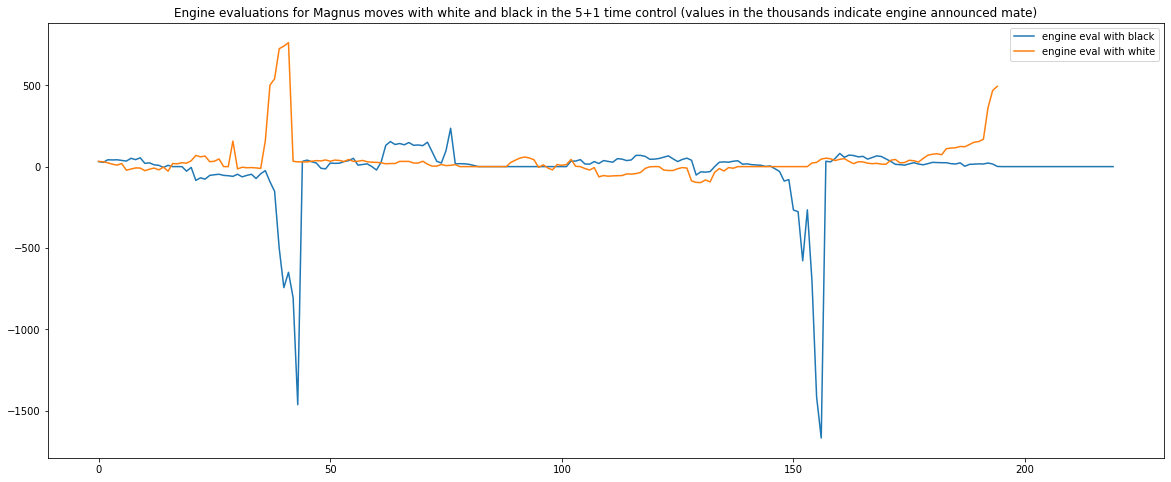

In [267]:
plt.rcParams["figure.figsize"] = (20,8)
plt.plot(engine_evals_black_magnus_five, label='engine eval with black')
plt.plot(engine_evals_white_magnus_five, label='engine eval with white')
plt.title('Engine evaluations for Magnus moves with white and black in the 5+1 time control (values in the thousands indicate engine announced mate)')
plt.legend()
plt.show()

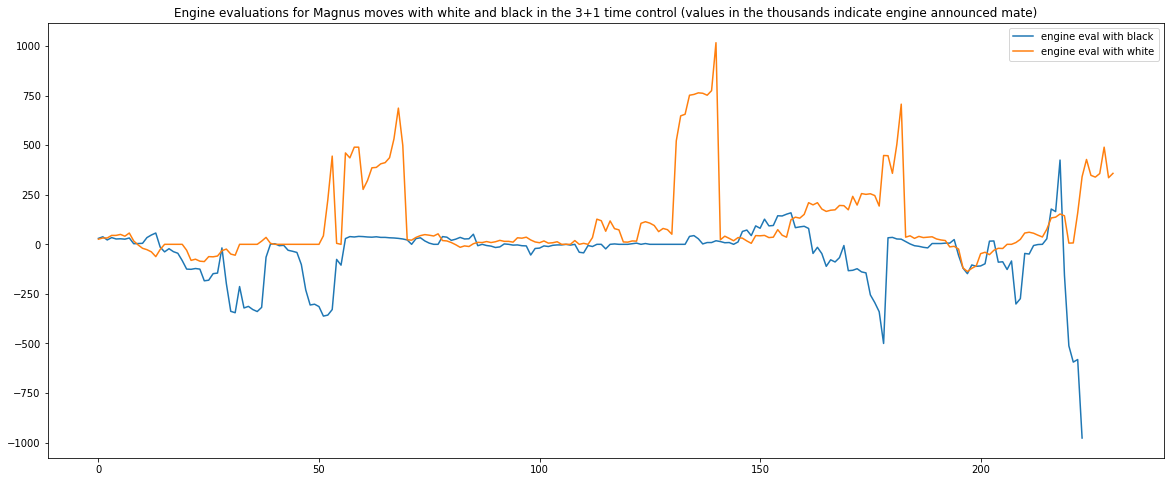

In [268]:
plt.plot(engine_evals_black_magnus_three, label='engine eval with black')
plt.plot(engine_evals_white_magnus_three, label='engine eval with white')
plt.title('Engine evaluations for Magnus moves with white and black in the 3+1 time control (values in the thousands indicate engine announced mate)')
plt.legend()
plt.show()

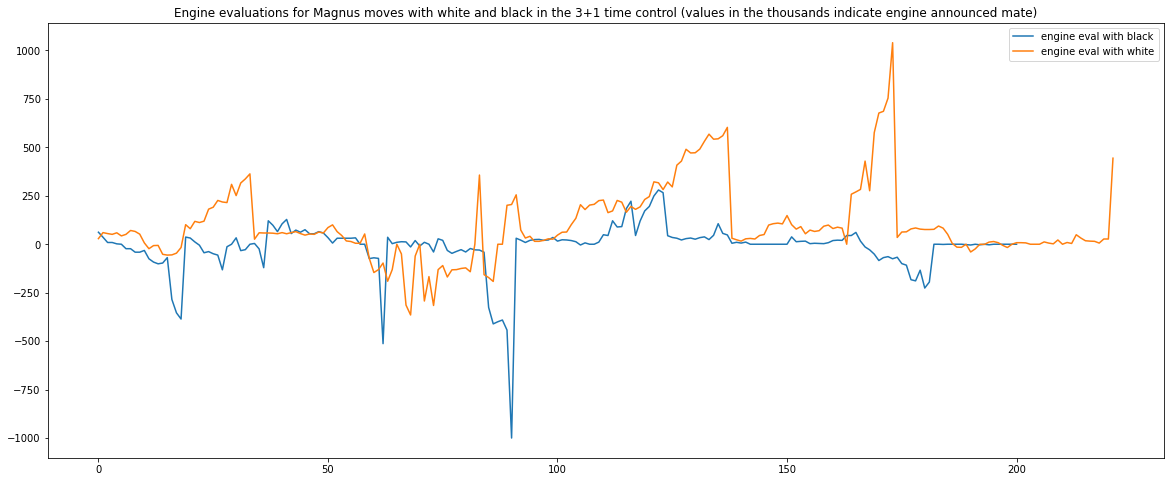

In [269]:
plt.plot(engine_evals_black_magnus_bullet, label='engine eval with black')
plt.plot(engine_evals_white_magnus_bullet, label='engine eval with white')
plt.title('Engine evaluations for Magnus moves with white and black in the 3+1 time control (values in the thousands indicate engine announced mate)')
plt.legend()
plt.show()

### We can see low level of fluctuations in engine evaluations for Magnus moves in the slower time controls, and as expected higher ones in faster time controls. But it's almost always in Magnus' favor, which indicated that Magnus was performing very well consistently and never let go of he advantage once he achieved it.

#### Finally let's see how much rating points Magnus gained as a result of this dominant performance

In [276]:
elos = []
for row in match_games.itertuples():
    if row.white_player == 'MagnusCarlsen':
        elos.append(row.white_elo)
    elif row.black_player == 'MagnusCarlsen':
        elos.append(row.black_elo)

print(f'Magnus starting rating in this match was: {elos[0]}')
print(f'Magnus maximum rating in this match was: {max(elos)}')
print(f'Magnus minimum rating in this match was: {min(elos)}')
print(f'Magnus Final rating was: {elos[-1]}')
print(f'Magnus gained {elos[-1] - elos[0]} rating points in this match!')

Magnus starting rating in this match was: 3282
Magnus maximum rating in this match was: 3301
Magnus minimum rating in this match was: 3267
Magnus Final rating was: 3294
Magnus gained 12 rating points in this match!
